# Differences Between Full-Time Employees and Independent Contractors
This notebook uses Stack Overflow's 2017 Survey data to investigate if certain results are different if the respondent is a full-time employee at a company versus an independent contractor.  The main areas of interest are:
<ul>
    <li>Highest level of formal education</li>
    <li>Career satisfaction score</li>
    <li>Job security importance</li>
</ul>

## Gathering the Data

In [1]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read in the data set
df_raw = pd.read_csv('survey-results-public.csv')

# Remove columns that are not of interest
df_raw = df_raw[['Professional', 'EmploymentStatus', 'FormalEducation', 'CareerSatisfaction', 'JobSecurity']]

## Assessing the Data

In [3]:
# Print dataframe info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 5 columns):
Professional          51392 non-null object
EmploymentStatus      51392 non-null object
FormalEducation       51392 non-null object
CareerSatisfaction    42695 non-null float64
JobSecurity           31240 non-null object
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [4]:
# Print unique values in Professional column
[print(item) for item in df_raw.Professional.unique()];

Student
Professional developer
Professional non-developer who sometimes writes code
Used to be a professional developer
None of these


In [5]:
# Print unique values in EmploymentStatus column
[print(item) for item in df_raw.EmploymentStatus.unique()];

Not employed, and not looking for work
Employed part-time
Employed full-time
Independent contractor, freelancer, or self-employed
Not employed, but looking for work
I prefer not to say
Retired


In [6]:
# Print unique values in JobSecurity column
[print(item) for item in df_raw.JobSecurity.unique()];

Strongly agree
nan
Agree
Somewhat agree
Strongly disagree
Disagree


The cleaning will aim to accomplish the following tasks:
<ul>
    <li>Remove entries of "Student" and "None of these" from the <i>Professional</i> column - these respondents probably don't have a qualified opinion for the investigation</li>
    <li>Remove all entries except "Employed part-time" and "Independent contractor, freelancer, or self-employed" from the <i>EmploymentStatus</i> column - the other statuses are not of interest</li>
    <li>Remove entries with null values</li>
</ul>

## Cleaning the Data

In [7]:
# Create a copy of the data
df_cleaning = df_raw.copy()

### Cleaning Task 1

In [8]:
# Remove entries where the responder is a student
df_cleaning = df_cleaning.query('Professional != "Student"')

# Confirm cleaning task was completed successfully
[print(item) for item in df_cleaning.Professional.unique()];

Professional developer
Professional non-developer who sometimes writes code
Used to be a professional developer
None of these


### Cleaning Task 2

In [9]:
# Remove entries where the employment status is not Full-Time or Independent
df_cleaning = df_cleaning.query('EmploymentStatus == "Employed full-time" or EmploymentStatus == "Independent contractor, freelancer, or self-employed"')

# Confirm cleaning task was completed successfully
[print(item) for item in df_cleaning.EmploymentStatus.unique()];

Employed full-time
Independent contractor, freelancer, or self-employed


### Cleaning Task 3

In [10]:
# Display dataframe info
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39370 entries, 2 to 51391
Data columns (total 5 columns):
Professional          39370 non-null object
EmploymentStatus      39370 non-null object
FormalEducation       39370 non-null object
CareerSatisfaction    39015 non-null float64
JobSecurity           24649 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


After cleaning from the other two steps was completed, there are slightly over 39,000 entries remaining.  The <i>CareerSatisfaction</i> column has a small number of null entries.  Those can be removed without further investigation, as the loss of data will be negligible.  Rather than removing the entries where the <i>JobSecurity</i> column is null, these null entries will be filled with a value of "No response".

In [11]:
# Remove null entries from CareerSatisfaction column
df_cleaning.dropna(subset = ['CareerSatisfaction'], inplace = True)

# Confirm cleaning task was completed successfully
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39015 entries, 2 to 51391
Data columns (total 5 columns):
Professional          39015 non-null object
EmploymentStatus      39015 non-null object
FormalEducation       39015 non-null object
CareerSatisfaction    39015 non-null float64
JobSecurity           24537 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [12]:
# Fill null entries from JobSecurity column with value of "No response"
df_cleaning.JobSecurity.fillna("No response", inplace = True)

# Confirm cleaning task was completed successfully
[print(item) for item in df_cleaning.JobSecurity.unique()];

Agree
Somewhat agree
No response
Strongly agree
Strongly disagree
Disagree


### Finishing touches

In [13]:
# Create dataframe for entries of full-time employees
df_ft = df_cleaning.query('EmploymentStatus == "Employed full-time"')

# Create dataframe for entries of independent contractors
df_ind = df_cleaning.query('EmploymentStatus == "Independent contractor, freelancer, or self-employed"')

# Drop Professional and EmploymentStatus columns from new dataframes
df_ft.drop(columns = ['Professional', 'EmploymentStatus'], inplace = True)
df_ind.drop(columns = ['Professional', 'EmploymentStatus'], inplace = True)

C:\Users\davee\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Analysis

### Question 1: Differences in Formal Education
Are full-time employees more highly educated than independent contractors?

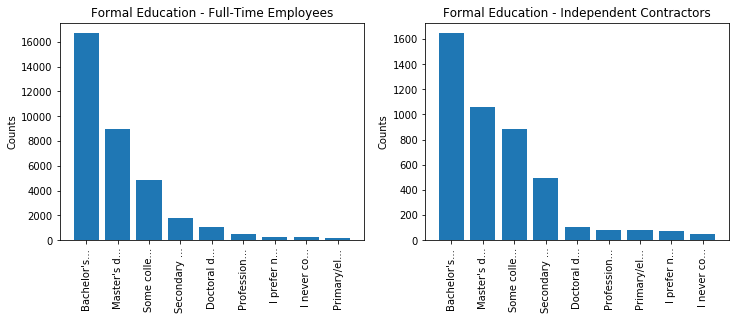

In [14]:
# Get value counts for each answer in formal education for full-time employees
ft_formal_education = df_ft.FormalEducation.value_counts()

# Get value counts for each answer in formal education for independent contractors
ind_formal_education = df_ind.FormalEducation.value_counts()

# Convert value count numpy series results into lists for use in a bar chart
ft_fe_labels = list(ft_formal_education.index)
ft_fe_values = list(ft_formal_education)
ind_fe_labels = list(ind_formal_education.index)
ind_fe_values = list(ind_formal_education)

# Abbreviate the labels to produce cleaner plots
for item in range(len(ft_fe_labels)):
    ft_fe_labels[item] = ft_fe_labels[item][0:10] + '...'

for item in range(len(ind_fe_labels)):
    ind_fe_labels[item] = ind_fe_labels[item][0:10] + '...'

# Set figure size
plt.figure(figsize = [12, 4])

# Create bar plot for full-time employee formal education
plt.subplot(1,2,1)
ft_fe_x_ticks = np.arange(len(ft_fe_labels))
plt.bar(ft_fe_x_ticks, ft_fe_values);
plt.xticks(ft_fe_x_ticks, ft_fe_labels, rotation = 'vertical')
plt.ylabel('Counts')
plt.title('Formal Education - Full-Time Employees');


# Create bar plot for independent contractor formal education
plt.subplot(1,2,2)
ind_fe_x_ticks = np.arange(len(ind_fe_labels))
plt.bar(ind_fe_x_ticks, ind_fe_values);
plt.xticks(ind_fe_x_ticks, ind_fe_labels, rotation = 'vertical')
plt.ylabel('Counts')
plt.title('Formal Education - Independent Contractors');

In [15]:
# Find proportion of full-time employees with post-graduate degrees
ft_post_grad = (ft_formal_education["Master's degree"] + ft_formal_education["Doctoral degree"])/len(df_ft)

# Find proportion of independent contractors with post-graduate degrees
ind_post_grad = (ind_formal_education["Master's degree"] + ind_formal_education["Doctoral degree"])/len(df_ind)

# Find proportion of full-time employees that never finished college
ft_never_grad = (ft_formal_education ["Some college/university study without earning a bachelor's degree"] +
                ft_formal_education["Secondary school"] +
                ft_formal_education["I never completed any formal education"] +
                ft_formal_education["Primary/elementary school"]) / len(df_ft)

# Find proportion of independent contractors that never finished college
ind_never_grad = (ind_formal_education ["Some college/university study without earning a bachelor's degree"] +
                ind_formal_education["Secondary school"] +
                ind_formal_education["I never completed any formal education"] +
                ind_formal_education["Primary/elementary school"]) / len(df_ind)

# Print the findings
print("Proportion of full-time employees with postgraduate education: ", ft_post_grad)
print("Proportion of independent contractors with postgraduate education: ", ind_post_grad)
print("")
print("Proportion of full-time employees that never finished college: ", ft_never_grad)
print("Proportion of independent contractors that never finished college: ", ind_never_grad)

Proportion of full-time employees with postgraduate education:  0.2910322468592601
Proportion of independent contractors with postgraduate education:  0.26023718952785857

Proportion of full-time employees that never finished college:  0.2027731141087246
Proportion of independent contractors that never finished college:  0.3369881405236071


Full-time employees tend to have slightly more postgraduate education, but are far more likely to have finished college.

### Question 2: Difference in Career Satisfaction
Are full-time employees more satisfied with their careers than independent contractors?

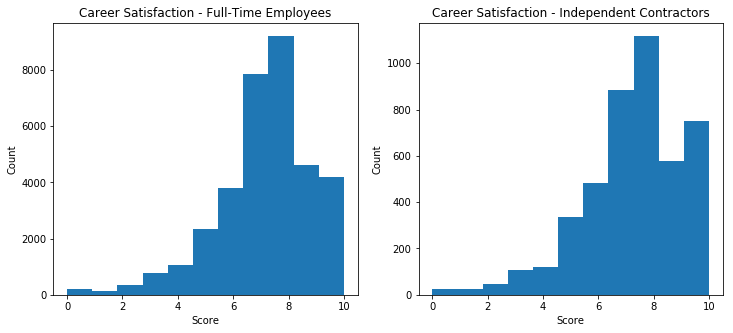

In [16]:
# Set figure size
plt.figure(figsize = [12, 5])

# Create histogram for career satisfaction of full-time employees
plt.subplot(1,2,1)
plt.title('Career Satisfaction - Full-Time Employees')
plt.xlabel('Score')
plt.ylabel('Count')
plt.hist(data = df_ft, x = 'CareerSatisfaction', bins = 11);

# Create histogram for career satisfaction of independent contractors
plt.subplot(1,2,2)
plt.title('Career Satisfaction - Independent Contractors')
plt.xlabel('Score')
plt.ylabel('Count')
plt.hist(data = df_ind, x = 'CareerSatisfaction', bins = 11);

In [17]:
# Find mean career satisfaction score for full-time employees
ft_cs_mean = df_ft.CareerSatisfaction.mean()

# Find mean career satisfaction score for independent contractors
ind_cs_mean = df_ind.CareerSatisfaction.mean()

# Print the findings
print("The average career satisfaction score for full-time employees is ", ft_cs_mean)
print("The average career satisfaction score for independent contractors is ", ind_cs_mean)

The average career satisfaction score for full-time employees is  7.3545996642158284
The average career satisfaction score for independent contractors is  7.453792794808682


Independent contractors have a slightly higher mean career satisfaction.

### Question 3
Do full-time employees value job security more than independent contractors?

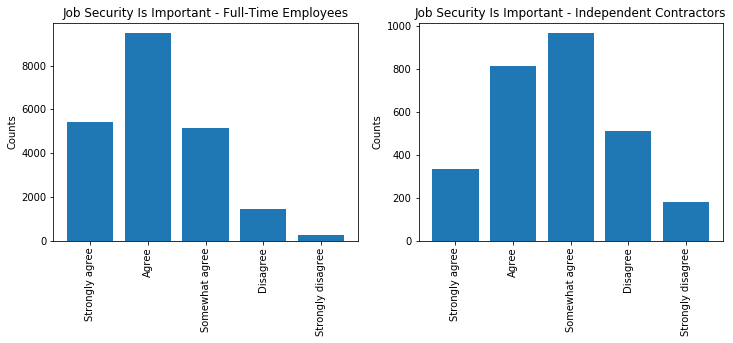

In [18]:
# Get value counts for each answer in job security for full-time employees, omitting no response values
ft_job_security = df_ft.query('JobSecurity != "No response"').JobSecurity.value_counts()

# Get value counts for each answer in job security for independent contractors
ind_job_security = df_ind.query('JobSecurity != "No response"').JobSecurity.value_counts()

# Convert value count numpy series results into ordered lists for use in a bar chart
js_labels = ['Strongly agree', 'Agree', 'Somewhat agree', 'Disagree', 'Strongly disagree']

ft_js_values = []
ind_js_values = []

for item in range(len(js_labels)):
    ft_js_values.append(ft_job_security[js_labels[item]])
    ind_js_values.append(ind_job_security[js_labels[item]])

# Set figure size
plt.figure(figsize = [12, 4])

# Create bar plot for full-time employee job security
plt.subplot(1,2,1)
ft_js_x_ticks = np.arange(len(js_labels))
plt.bar(ft_js_x_ticks, ft_js_values);
plt.xticks(ft_js_x_ticks, js_labels, rotation = 'vertical')
plt.ylabel('Counts')
plt.title('Job Security Is Important - Full-Time Employees');


# Create bar plot for independent contractor job security
plt.subplot(1,2,2)
ind_js_x_ticks = np.arange(len(js_labels))
plt.bar(ind_js_x_ticks, ind_js_values);
plt.xticks(ind_js_x_ticks, js_labels, rotation = 'vertical')
plt.ylabel('Counts')
plt.title('Job Security Is Important - Independent Contractors');

In [19]:
# Make list of job security responses that can be characterized as agreeing with the prompt
agreed = ['Strongly agree', 'Agree', 'Somewhat agree']

# Find proportion of full-time employees that agree job security is important
ft_js_agreed = 0
ind_js_agreed = 0

for item in agreed:
    ft_js_agreed += ft_job_security[item]
    ind_js_agreed += ind_job_security[item]

ft_js_prop = ft_js_agreed / len(df_ft.query('JobSecurity != "No response"'))
ind_js_prop = ind_js_agreed / len(df_ind.query('JobSecurity != "No response"'))

# Print the findings
print("The proportion of full-time employees that think job security is important is ", ft_js_prop)
print("The proportion of independent contractors that think job security is important is ", ind_js_prop)

The proportion of full-time employees that think job security is important is  0.9215298232695139
The proportion of independent contractors that think job security is important is  0.752936988252047


Full-time employees value job security more than independent contractors.